In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv("data.csv")

In [3]:
print(data.head())

     0    1    2    3    4    5    6    7    8
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0
4  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0


In [4]:
### Random

In [24]:
n = 50000
num_ads = 9
total_reward = 0
  
chosen_ad = np.zeros(num_ads)      
for i in range(n):  
    selected_ad = random.randrange(num_ads)
    chosen_ad[selected_ad] += 1
    val = data.values[i,selected_ad]
    total_reward += val

Total Reward Choosing Random Ad:  10533.0


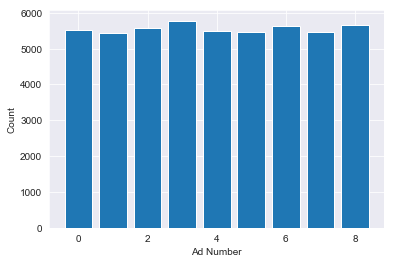

In [25]:
print('Total Reward Choosing Random Ad: ', total_reward)
x = list(range(num_ads))
plt.bar(x,chosen_ad)
plt.xlabel('Ad Number')
plt.ylabel('Count')
plt.show()

In [7]:
### UCB

In [8]:
n = 50000           
num_ads = 9                 
chosen_ad = []                     
number_of_selections = [0] * num_ads
ad_reward = [0] * num_ads 
overall_reward = 0 

In [9]:
for i in range(n):
    max_upper_bound = 0     
    ad = 0               
    for j in range(0,num_ads): 
        if (number_of_selections[j] > 0):
            average_reward = ad_reward[j]/number_of_selections[j]  
            dj = (math.sqrt(3/2) * math.log(i + 1)/number_of_selections[j])    
            upper_bound = average_reward + dj           
        else:
            upper_bound = 1e5                  
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = j
    chosen_ad.append(ad)                
    number_of_selections[ad] += 1  
    reward = data.values[i,ad]              
    ad_reward[ad] += reward       
    overall_reward += reward 

Total Reward UCB Approach:  17128.0


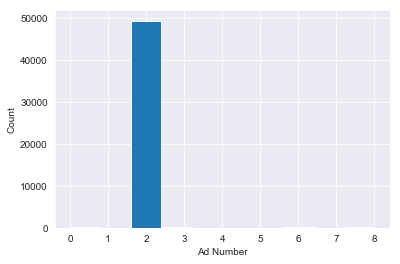

In [10]:
print('Total Reward UCB Approach: ', overall_reward)
plt.hist(chosen_ad)
plt.xlabel('Ad Number')
plt.ylabel('Count')
plt.show()

In [11]:
### Actual Data Distribution

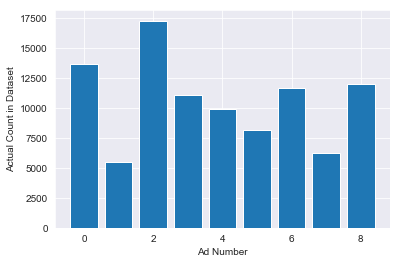

In [12]:
actual_counts = (np.sum(data,axis = 0))
x = list(range(num_ads))
plt.bar(x,actual_counts)
plt.xlabel('Ad Number')
plt.ylabel('Actual Count in Dataset')
plt.show()

In [13]:
### Epsilon Greedy

In [14]:
class Bandit: 
    def __init__(self,num_ads): 
        self.ads = np.zeros(num_ads) 
        self.estimates = np.zeros(num_ads) 


    def choose(self,epsilon):
        rand_num = np.random.random() 
        if rand_num < epsilon: 
            return np.random.randint(num_ads) 
        else: 
            return np.argmax(self.estimates)

    def update(self,action,reward): 
        self.ads[action] += 1 
        alpha = 1./self.ads[action] 
        self.estimates[action] += alpha * (reward - self.estimates[action])

In [15]:
def experiment(bandit,data,epsilon):
    history = [] 
    for i in range(data.shape[0]): 
        action = bandit.choose(epsilon)
        R = data.iloc[i,action]
        bandit.update(action,R) 
        history.append(R) 
    return np.sum(np.array(history))

In [16]:
print(data.shape[0])

50000


In [17]:
num_trials = 10
num_ads = 9
epsilon_vals = [0.01,0.05,0.1,0.25,0.35,0.45,0.6,0.75]
configuration_arr = np.zeros(len(epsilon_vals))


for i in range(num_trials):
    for j in range(len(epsilon_vals)):
        bandit = Bandit(num_ads) 
        configuration_arr[j] += experiment(bandit,data,epsilon_vals[j]) 

configuration_arr = configuration_arr/num_trials

print("Total Reward for Each Configuration is: ", configuration_arr)



Total Reward for Each Configuration is:  [15911.1 16575.6 16494.  15531.  14886.9 14224.  13242.3 12272. ]


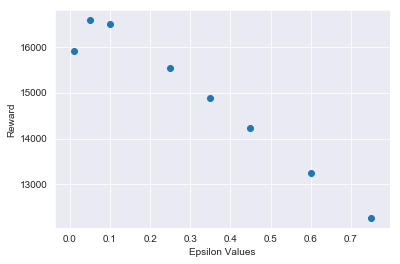

In [18]:
plt.scatter(epsilon_vals,configuration_arr)
plt.xlabel("Epsilon Values")
plt.ylabel("Reward")
plt.show()

In [19]:
### Thompson sampling

In [20]:
n = data.shape[0]
num_ads = 9
total_reward = 0
prob = np.zeros(num_ads)
success = np.zeros(num_ads, dtype=np.int)
failure = np.zeros(num_ads, dtype=np.int)
ad_chosen = np.zeros(num_ads, dtype=np.int)

for i in range(n):
  
    for j in range(num_ads): 
        prob[j] = np.random.beta(success[j] + 1, failure[j] + 1)
    
    machine = np.argmax(prob)
    ad_chosen[machine] += 1

    if data.iloc[i,machine] == 1:
        success[machine] += 1
        total_reward += 1
    else:
        failure[machine] += 1


Total Reward is:  17107


Total Reward Thompson Sampling is:  17107


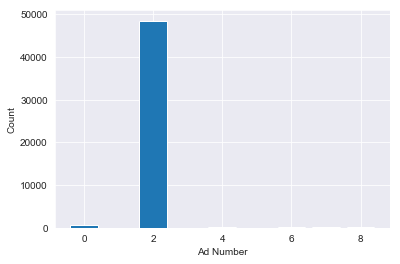

In [23]:
print("Total Reward Thompson Sampling is: ", total_reward)
x = list(range(num_ads))
plt.bar(x,ad_chosen)
plt.xlabel('Ad Number')
plt.ylabel('Count')
plt.show()